In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
import warnings
warnings.simplefilter("ignore")

In [2]:
late_ship = pd.read_csv("C:/Users/Emigb/Documents/Data Science/datasets/late_shipments.csv")
stack = pd.read_csv("C:/Users/Emigb/Documents/Data Science/datasets/stack_overflow.csv")

In [3]:
late_ship.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


CALCULATING SAMPLE MEAN

The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.
We begin our analysis by calculating a point estimate (or sample statistic), namely the proportion of late shipments.

In [4]:
#1. Calculate the proportion of late shipments in the sample; that is, the mean cases where the late column is "Yes".
late_ship_samp = (late_ship['late']=='Yes').mean()
print(late_ship_samp)

0.061


Z-TESTS

Use case: Compare sample mean to population mean when population standard deviation is known and sample size is large (n > 30).

CALCULATING Z-SCORES

Since variables have arbitrary ranges and units, we need to standardize them. For example, a hypothesis test that gave different answers if the variables were in Euros instead of US dollars would be of little value. Standardization avoids that.
One standardized value of interest in a hypothesis test is called a z-score. To calculate it, you need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).


The null hypothesis, (H₀), is that the proportion of late shipments is six percent.

The alternative hypothesis, (HA), is that the proportion of late shipments is greater than six percent.



In [5]:
late_ship_hyp = 6/100

In [6]:
#Calculating the bootstrap distribution of sample mean
late_shipments_boot_distn = []
for i in range (5000):
    late_shipments_boot_distn.append(
        np.mean(
            late_ship.sample(frac=1,replace=True)['late_delivery']
        )
    )

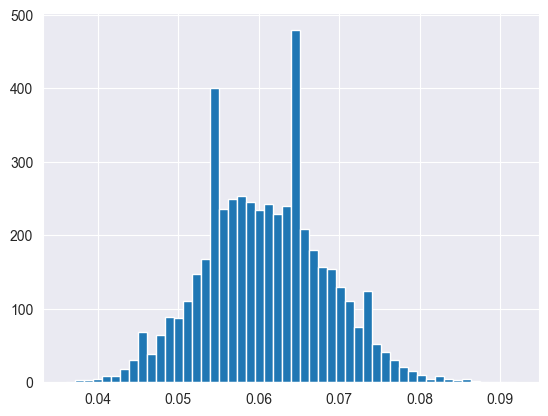

In [7]:
plt.hist(late_shipments_boot_distn, bins = 50)
plt.show()

In [8]:
#Calculating Standard Error
std_error = np.std(late_shipments_boot_distn, ddof=1)

In [24]:
#Calculation Z-Score
z_score = (late_ship_samp-late_ship_hyp)/std_error
print(z_score)

0.1308060682187427


CALCULATING P-VALUES (For Z-Score)

In [27]:
#Calculating p-values form scipy.stats
# Since HA > H0, we need a right-tailed test.
p_val = 1 - norm.cdf(z_score, loc=0, scale = 1)
print(p_val)

0.4479643612508002


Calculating a confidence interval

If you give a single estimate of a sample statistic, you are bound to be wrong by some amount. For example, the hypothesized proportion of late shipments was 6%. Even if evidence suggests the null hypothesis that the proportion of late shipments is equal to this, for any new sample of shipments, the proportion is likely to be a little different due to sampling variability. Consequently, it's a good idea to state a confidence interval. That is, you say, "we are 95% 'confident' that the proportion of late shipments is between A and B" (for some value of A and B).

In [34]:
alpha = 0.05

#aplha is the statistical significance, it  is the threshold point for "beyond reasonable doubt". Common values of alpha are 0.2, 0.1, 0.05, & 0.01

In [32]:
#Calculate a 95% confidence interval from late_shipments_boot_distn using the quantile method, labeling the lower and upper intervals lower and upper.

lower = np.quantile (late_shipments_boot_distn, 0.025)
upper = np.quantile (late_shipments_boot_distn, 0.975)

print(lower, upper)

0.046 0.076


In [37]:
#Does the confidence interval match up with the conclusion to stick with the original assumption that 6% is a reasonable value for the unknown population parameter?

#Yes, since 0.06 (the hypothesized percentage of late shipments) is included in the 95% confidence interval and we failed to reject due to a large p-value, the results are similar.

T-TESTS
Use case: Compare sample mean(s) when population std deviation is unknown.

Two sample mean test statistic (2 Sample T-Test)



The hypothesis test for determining if there is a difference between the means of two populations uses a "T-Test", and it can be calculated from three values from each sample using this equation.

In [28]:
#Calculating for the value of xbar (sample mean)
xbar = late_ship.groupby('late')['weight_kilograms'].mean()
print(xbar)

xbar_no = xbar['No']
xbar_yes = xbar['Yes']


late
No     1897.791267
Yes    2715.672131
Name: weight_kilograms, dtype: float64


In [11]:
#Calculating for the value of sbar (sample std)
sbar = late_ship.groupby('late')['weight_kilograms'].std()
print(sbar)

sbar_no = sbar['No']
sbar_yes = sbar['Yes']

late
No     3154.039507
Yes    2544.688211
Name: weight_kilograms, dtype: float64


In [12]:
#Calculating for the value of n (sample size)
n = late_ship.groupby('late')['weight_kilograms'].count()
print(n)

n_no = n['No']
n_yes = n['Yes']

late
No     939
Yes     61
Name: weight_kilograms, dtype: int64


In [13]:
#Calculate the numerator of the t test statistic.
numerator = xbar_no - xbar_yes
print(numerator)

-817.8808638418964


In [14]:
#Calculate the denominator of the t test statistic.
denominator = np.sqrt(sbar_no ** 2/n_no + sbar_yes **2/n_yes)
print(denominator)

341.68543274794337


CALCULATING P-VALUES

In [15]:
# Calculate the test statistic
t_stat = numerator/denominator
print(t_stat)

-2.3936661778766433


In [23]:
#Calculating for degrees of freedom (df)
df = n_no + n_yes - 2

#Calculating p-values form scipy.stats
# Since HA > H0, we need a right-tailed test.
p_value = 1-t.cdf(t_stat, df=df)
print(p_value)

0.9915676178537505
